<a href="https://colab.research.google.com/github/zainabahmed16/Mini-Project-IMAGE-CLASSIFICATION-/blob/master/MAJOR_PROJECT_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/covid 19/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51142,NaN,NaN,International,2020-10-15,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51143,NaN,NaN,International,2020-10-16,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51144,NaN,NaN,International,2020-10-17,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51145,NaN,NaN,International,2020-10-18,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51147 entries, 0 to 51146
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         50853 non-null  object 
 1   continent                        50559 non-null  object 
 2   location                         51147 non-null  object 
 3   date                             51147 non-null  object 
 4   total_cases                      47553 non-null  float64
 5   new_cases                        50281 non-null  float64
 6   new_cases_smoothed               49495 non-null  float64
 7   total_deaths                     38789 non-null  float64
 8   new_deaths                       50281 non-null  float64
 9   new_deaths_smoothed              49495 non-null  float64
 10  total_cases_per_million          47295 non-null  float64
 11  new_cases_per_million            50217 non-null  float64
 12  new_cases_smoothed

In [3]:
#how many countries are infected or no of countries
print(df['location'].nunique())
print(df['location'].unique()) 

213
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guate

In [4]:
df["location"].value_counts()

Ireland            294
Luxembourg         294
Israel             294
Czech Republic     294
Algeria            294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           44
Solomon Islands      4
Name: location, Length: 213, dtype: int64

In [6]:
#the worst effected country till now
countries = df['location'].values

In [7]:
country_wise_total_deaths = {}
country_wise_deaths_per_million = {}
for country in countries:
    data_temp = df[df['location'] == country]
    country_wise_total_deaths[country] = data_temp['total_deaths'].max()
    country_wise_deaths_per_million[country] = data_temp['total_deaths_per_million'].max()

In [8]:
#removing the world form the list 
country_wise_total_deaths.pop('World', None)
country_wise_deaths_per_million.pop('World', None)

142.997

In [9]:
#top 20 countries on worst codition
from collections import Counter
k1 = Counter(country_wise_total_deaths)
cwtd_25 = k1.most_common(20)

k2 = Counter(country_wise_deaths_per_million)
cwdpm_25 = k2.most_common(20)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

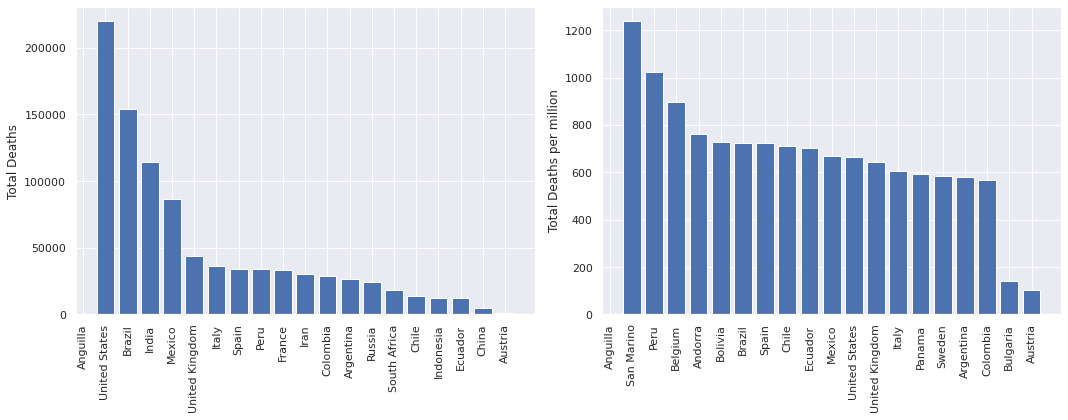

In [11]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].bar(*zip(*cwtd_25))
axes[0].tick_params(axis='x',labelrotation=90)
axes[0].set_ylabel('Total Deaths')

axes[1].bar(*zip(*cwdpm_25))
axes[1].tick_params(axis='x',labelrotation=90)
axes[1].set_ylabel('Total Deaths per million')

plt.tight_layout()

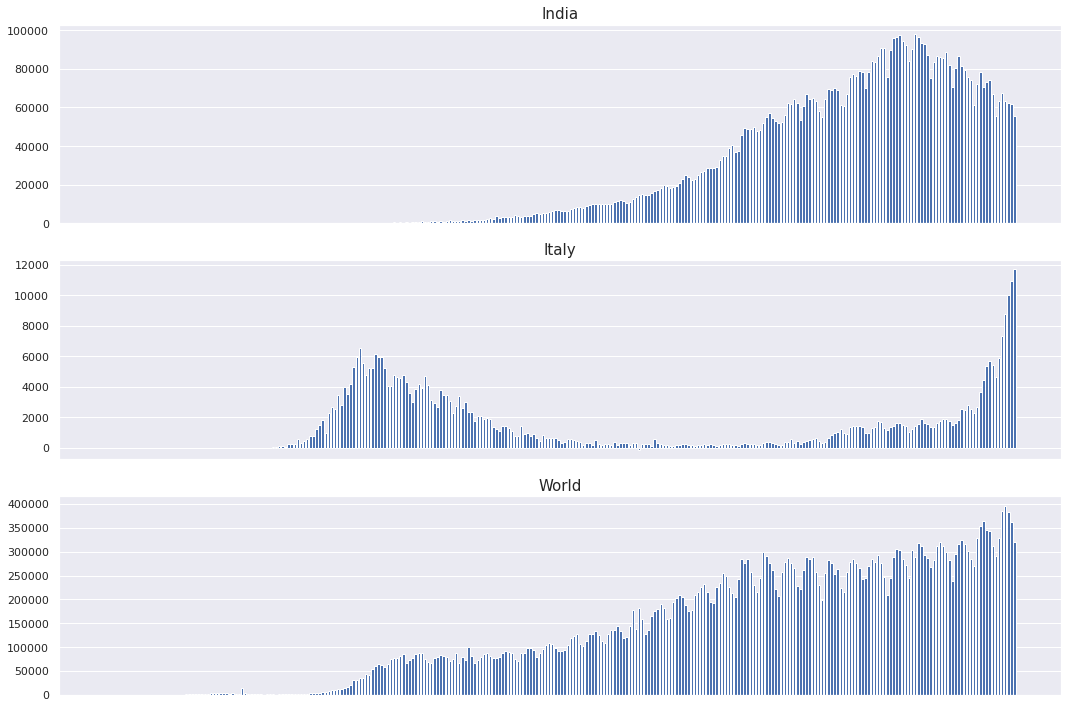

In [12]:
# plotting daily new cases for India, Italy and World
lst = ['India', 'Italy', 'World']
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex= True)
i = 0
for country in lst:
    temp_data = df[df['location']==country]
    axes[i].bar(range(temp_data.shape[0]), temp_data['new_cases'])
    axes[i].set_title(country, size=15)
    axes[i].set_xticks([])
    i+=1
plt.tight_layout()

In [36]:
#italy
data = df[df['location'] == 'Italy'].reset_index()
data.drop('index', axis=1, inplace=True)

In [37]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ITA,Europe,Italy,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
1,ITA,Europe,Italy,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
2,ITA,Europe,Italy,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
3,ITA,Europe,Italy,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
4,ITA,Europe,Italy,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         294 non-null    object 
 1   continent                        294 non-null    object 
 2   location                         294 non-null    object 
 3   date                             294 non-null    object 
 4   total_cases                      263 non-null    float64
 5   new_cases                        294 non-null    float64
 6   new_cases_smoothed               288 non-null    float64
 7   total_deaths                     240 non-null    float64
 8   new_deaths                       294 non-null    float64
 9   new_deaths_smoothed              288 non-null    float64
 10  total_cases_per_million          263 non-null    float64
 11  new_cases_per_million            294 non-null    float64
 12  new_cases_smoothed_per

In [39]:
data_non_null = data.dropna(axis=1, how='any')
data_non_null

,iso_code,continent,location,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ITA,Europe,Italy,2019-12-31,0.0,0.0,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
1,ITA,Europe,Italy,2020-01-01,0.0,0.0,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
2,ITA,Europe,Italy,2020-01-02,0.0,0.0,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
3,ITA,Europe,Italy,2020-01-03,0.0,0.0,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
4,ITA,Europe,Italy,2020-01-04,0.0,0.0,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ITA,Europe,Italy,2020-10-15,7332.0,43.0,121.267,0.711,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
290,ITA,Europe,Italy,2020-10-16,8803.0,83.0,145.596,1.373,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
291,ITA,Europe,Italy,2020-10-17,10009.0,55.0,165.542,0.910,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
292,ITA,Europe,Italy,2020-10-18,10925.0,47.0,180.693,0.777,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88


In [40]:
data_non_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    294 non-null    object 
 1   continent                   294 non-null    object 
 2   location                    294 non-null    object 
 3   date                        294 non-null    object 
 4   new_cases                   294 non-null    float64
 5   new_deaths                  294 non-null    float64
 6   new_cases_per_million       294 non-null    float64
 7   new_deaths_per_million      294 non-null    float64
 8   population                  294 non-null    float64
 9   population_density          294 non-null    float64
 10  median_age                  294 non-null    float64
 11  aged_65_older               294 non-null    float64
 12  aged_70_older               294 non-null    float64
 13  gdp_per_capita              294 non

In [41]:
# checking unique values in each column
for col in data_non_null.columns:
    print(col, data_non_null[col].nunique())

iso_code 1
continent 1
location 1
date 294
new_cases 234
new_deaths 136
new_cases_per_million 234
new_deaths_per_million 136
population 1
population_density 1
median_age 1
aged_65_older 1
aged_70_older 1
gdp_per_capita 1
extreme_poverty 1
cardiovasc_death_rate 1
diabetes_prevalence 1
female_smokers 1
male_smokers 1
hospital_beds_per_thousand 1
life_expectancy 1
human_development_index 1


In [42]:
unique_val_cols = []
for col in data_non_null.columns:
    if data_non_null[col].nunique() == 1:
        unique_val_cols.append(col)

In [43]:
unique_val_cols

['iso_code',
 'continent',
 'location',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [44]:
data_italy = data_non_null.drop(unique_val_cols, axis = 1)

In [45]:
data_italy

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million
0,2019-12-31,0.0,0.0,0.000,0.000
1,2020-01-01,0.0,0.0,0.000,0.000
2,2020-01-02,0.0,0.0,0.000,0.000
3,2020-01-03,0.0,0.0,0.000,0.000
4,2020-01-04,0.0,0.0,0.000,0.000
...,...,...,...,...,...
289,2020-10-15,7332.0,43.0,121.267,0.711
290,2020-10-16,8803.0,83.0,145.596,1.373
291,2020-10-17,10009.0,55.0,165.542,0.910
292,2020-10-18,10925.0,47.0,180.693,0.777


In [46]:
data_final = data_italy

In [47]:
data_final.head()

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.0
1,2020-01-01,0.0,0.0,0.0,0.0
2,2020-01-02,0.0,0.0,0.0,0.0
3,2020-01-03,0.0,0.0,0.0,0.0
4,2020-01-04,0.0,0.0,0.0,0.0


In [48]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    294 non-null    object 
 1   new_cases               294 non-null    float64
 2   new_deaths              294 non-null    float64
 3   new_cases_per_million   294 non-null    float64
 4   new_deaths_per_million  294 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.6+ KB


In [49]:
# saving dates in a variable before converting date column to datetime dtype
# ploting will be easier with this
dates = data_final['date'].tolist()
data_final['date'] = pd.to_datetime(data_final['date'], format='%Y-%m-%d')
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    294 non-null    datetime64[ns]
 1   new_cases               294 non-null    float64       
 2   new_deaths              294 non-null    float64       
 3   new_cases_per_million   294 non-null    float64       
 4   new_deaths_per_million  294 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.6 KB


In [50]:
data_final.describe()

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million
count,294.000000,294.000000,294.000000,294.000000
mean,1408.982993,124.295918,23.303667,2.055765
std,1926.486909,213.162080,31.862861,3.525573
min,-148.000000,-31.000000,-2.448000,-0.513000
25%,177.250000,5.000000,2.931250,0.083000
50%,556.500000,17.000000,9.204500,0.281000
75%,1836.750000,132.250000,30.378750,2.187500
max,11705.000000,971.000000,193.593000,16.060000


ValueError: ignored

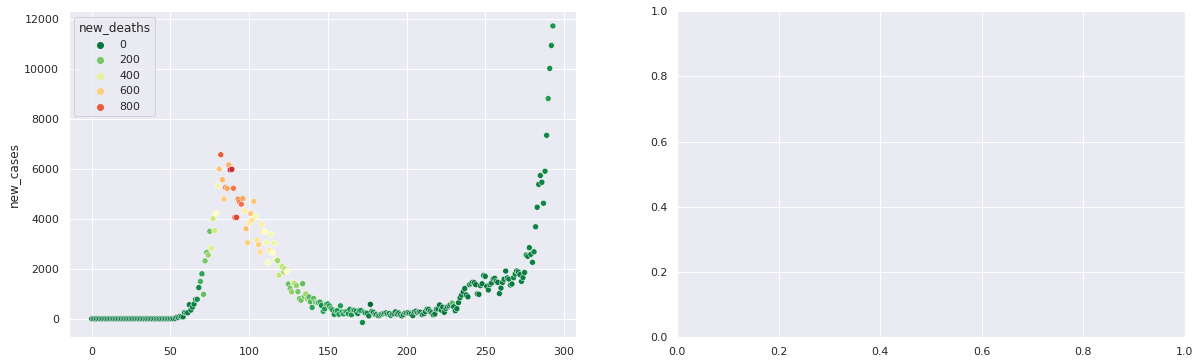

In [51]:
# plotting daily cases each day with hue of new deaths each day
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.scatterplot(x=range(data_final.shape[0]), y='new_cases', hue='new_deaths', data=data_final, palette='RdYlGn_r', ax=axes[0])
sns.scatterplot(x=range(data_final.shape[0]), y='total_cases', hue='new_deaths', data=data_final, palette='RdYlGn_r', ax=axes[1])
axes[0].set_xlabel('Day', size=18)
axes[0].set_ylabel('New Cases', size=18)
axes[1].set_xlabel('Day', size=18)
axes[1].set_ylabel('Total Cases', size=18)
plt.show()

KeyError: ignored

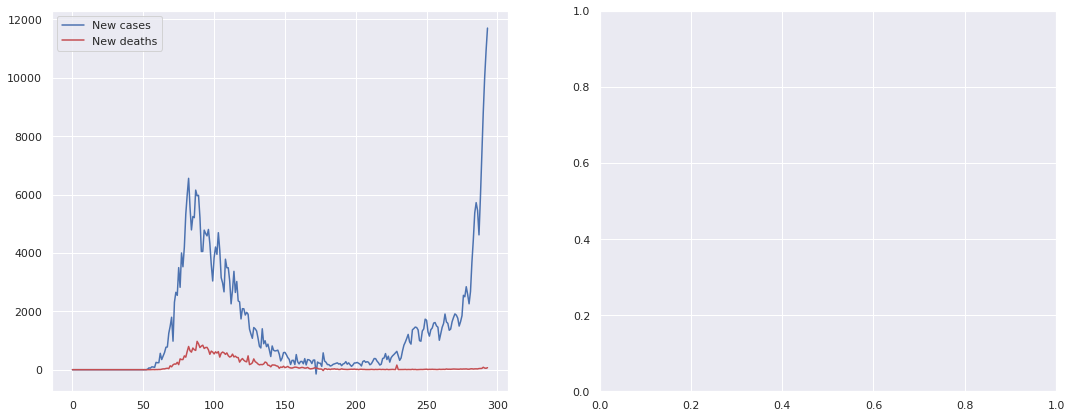

In [52]:
# plotting new deaths and new cases
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
axes[0].plot(data_final['new_cases'], label='New cases')
axes[0].plot(data_final['new_deaths'], label='New deaths', color='r')
axes[0].legend()

axes[1].plot(data_final['total_cases'], label='Total cases')
axes[1].plot(data_final['total_deaths'], label='Total deaths', color='r')
axes[1].legend()
plt.show()

In [53]:
from fbprophet import Prophet

In [54]:
new_cases_df = data_final[['date','new_cases']]
new_cases_df.columns = ['ds', 'y']

In [55]:
new_cases_df.head()

,ds,y
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


In [56]:
m = Prophet()
m.fit(new_cases_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future = m.make_future_dataframe(60,'D')
future.tail()

,ds
349,2020-12-14
350,2020-12-15
351,2020-12-16
352,2020-12-17
353,2020-12-18


In [58]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
349,2020-12-14,7747.801426,5855.777056,9490.374327
350,2020-12-15,7442.661131,5585.504273,9109.970152
351,2020-12-16,7547.308322,5832.164887,9342.241453
352,2020-12-17,7808.137338,6095.655780,9661.313461
353,2020-12-18,8015.540192,6192.859952,9929.788820


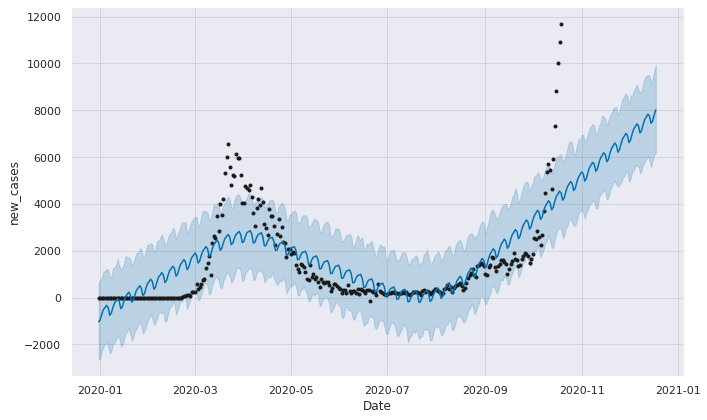

In [59]:
fig1 = m.plot(forecast,xlabel='Date',ylabel='new_cases')

In [60]:
new_deaths_df = data_final[['date','new_deaths']]
new_deaths_df.columns = ['ds', 'y']

In [61]:
new_deaths_df.tail()

,ds,y
289,2020-10-15,43.0
290,2020-10-16,83.0
291,2020-10-17,55.0
292,2020-10-18,47.0
293,2020-10-19,69.0


In [62]:
m2 = Prophet()
m2.fit(new_deaths_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future = m.make_future_dataframe(90,'H')
future.tail()

,ds
379,2020-10-22 14:00:00
380,2020-10-22 15:00:00
381,2020-10-22 16:00:00
382,2020-10-22 17:00:00
383,2020-10-22 18:00:00


In [64]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
379,2020-10-22 14:00:00,-13.895172,-167.930672,151.300976
380,2020-10-22 15:00:00,-13.920618,-176.066622,154.480898
381,2020-10-22 16:00:00,-13.948961,-185.179282,150.028725
382,2020-10-22 17:00:00,-13.979111,-180.432387,157.120644
383,2020-10-22 18:00:00,-14.009686,-177.175721,138.146107


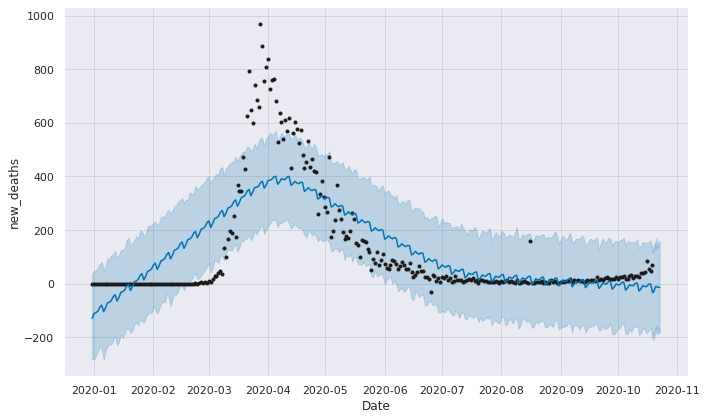

In [65]:
fig1 = m2.plot(forecast2,xlabel='Date',ylabel='new_deaths')

